# Sentiment Analysis on Movie Reviews

## Download The Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" Sections from Kaggle Competition Carefuly
- Make sure to download the `kaggle.json` file from your kaggle account and upload it on Colab

In [93]:
import os

In [ ]:
!pwd

/content


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [94]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

sentiment-analysis-on-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [95]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
replace data/sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [96]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sample_fname = 'data/sampleSubmission.csv'

In [97]:
import pandas as pd

In [98]:
raw_df = pd.read_csv(train_fname, sep = '\t')

In [99]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [92]:
raw_df.Phrase[1]

'A series of escapades demonstrating the adage that what is good for the goose'

#### The sentiment labels are:

- 0 - negative

- 1 - somewhat negative

- 2 - neutral

- 3 - somewhat positive

- 4 - positive

In [ ]:
raw_df.Phrase.sample(10).values

array(["Hugh Grant 's",
       'overcome the cultural moat surrounding its ludicrous and contrived plot',
       'a few rather than dozens', 'this uncharismatically beautiful',
       'an amoral assassin',
       'shimmering cinematography that lends the setting the ethereal beauty of an Asian landscape painting',
       ", profane and exploitative as the most offensive action flick you 've ever seen .",
       ', twisted sort',
       "A movie in which laughter and self-exploitation merge into jolly soft-porn 'em powerment .",
       'particularly vexing'], dtype=object)

In [100]:

test_df = pd.read_csv(test_fname, sep = '\t')

In [101]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [ ]:
sub_df = pd.read_csv(sample_fname)

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


### Data Exploration

<Axes: xlabel='Sentiment'>

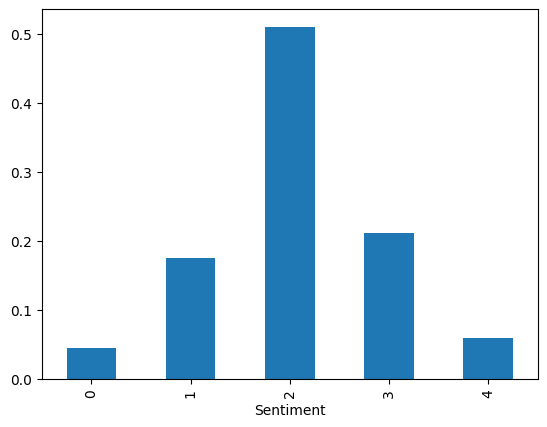

In [ ]:
import matplotlib.pyplot as plt
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind = 'bar')

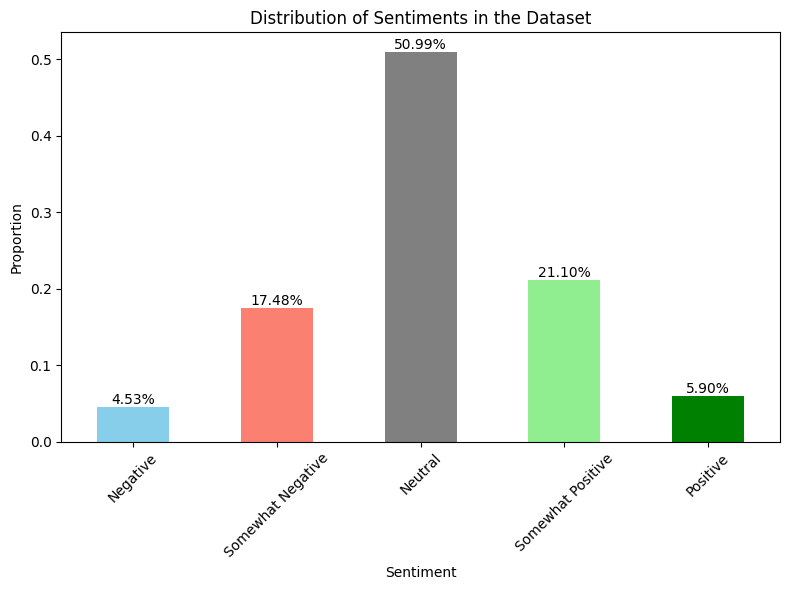

In [ ]:
import matplotlib.pyplot as plt

# Define custom colors for each sentiment bar
colors = ['skyblue', 'salmon', 'gray', 'lightgreen', 'green']

# Define labels for x-axis
sentiment_labels = ['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive']

# Get the sentiment distribution
sentiment_counts = raw_df.Sentiment.value_counts(normalize=True).sort_index()

# Plot the bar chart
ax = sentiment_counts.plot(kind='bar', color=colors,
                           figsize=(8, 6))


# Set title and labels
ax.set_title('Distribution of Sentiments in the Dataset')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Proportion')
ax.set_xticks(range(len(sentiment_labels)))
ax.set_xticklabels(sentiment_labels, rotation=45)

# Show percentage values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


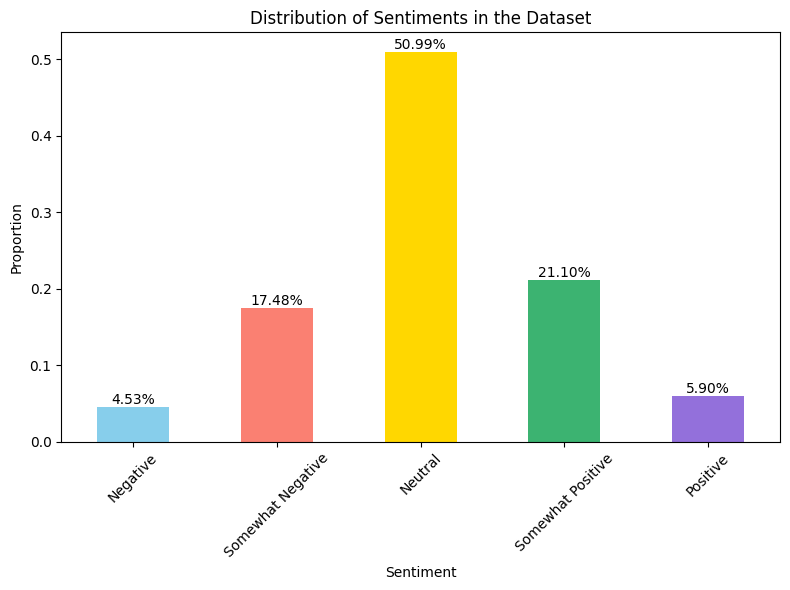

In [ ]:
# Define custom colors for each sentiment bar
colors = ['skyblue', 'salmon', 'gold', 'mediumseagreen', 'mediumpurple']

# Plot
sentiment_counts = raw_df.Sentiment.value_counts(normalize=True).sort_index()
ax = sentiment_counts.plot(kind='bar', color=colors,
                           figsize=(8, 6))

# Add annotations with two decimal places
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Set titles and labels
ax.set_title('Distribution of Sentiments in the Dataset')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Proportion')
ax.set_xticks(range(5))
ax.set_xticklabels(['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive'], rotation=45)

plt.tight_layout()
plt.show()


### More Summary Insights

## 1. Average Phrase Length per Sentiment

<ipython-input-25-60dd1790d7cd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='pastel')


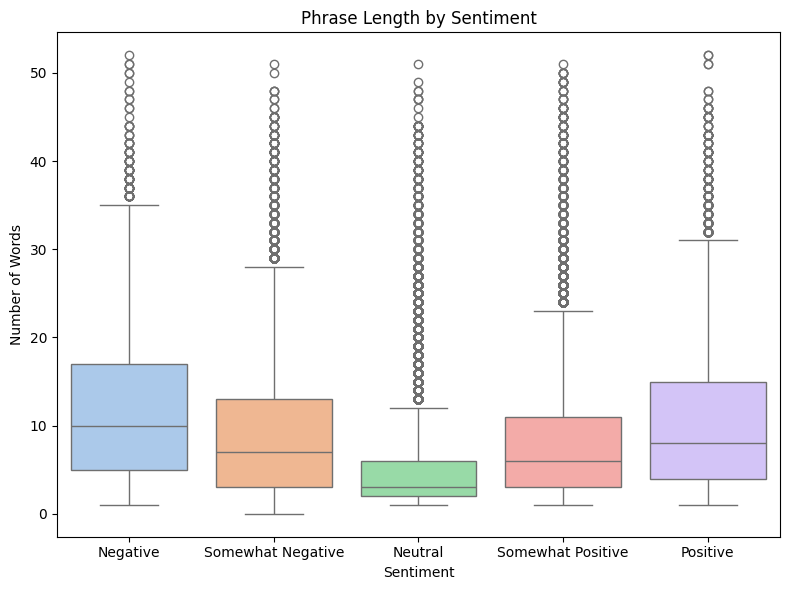

In [ ]:
import pandas as pd
import seaborn as sns

# Add phrase length column
raw_df['Phrase_Length'] = raw_df['Phrase'].apply(lambda x: len(x.split()))

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='pastel')
plt.title('Phrase Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.xticks(ticks=range(5), labels=sentiment_labels)
plt.tight_layout()
plt.show()


In [ ]:
raw_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_Length
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1


###  1. Descriptive Statistics Table

In [ ]:
# Group by sentiment and describe phrase length
phrase_length_summary = raw_df.groupby('Sentiment')['Phrase_Length'].describe()
print(phrase_length_summary)


             count       mean       std  min  25%   50%   75%   max
Sentiment                                                          
0           7072.0  12.105345  8.755793  1.0  5.0  10.0  17.0  52.0
1          27273.0   9.112016  7.609619  0.0  3.0   7.0  13.0  51.0
2          79582.0   5.194617  5.348528  1.0  2.0   3.0   6.0  51.0
3          32927.0   8.446594  7.566081  1.0  3.0   6.0  11.0  51.0
4           9206.0  10.701390  8.493600  1.0  4.0   8.0  15.0  52.0


### 2. Box Plot of Phrase Length per Sentiment

<ipython-input-28-375aea3400dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='Set2')


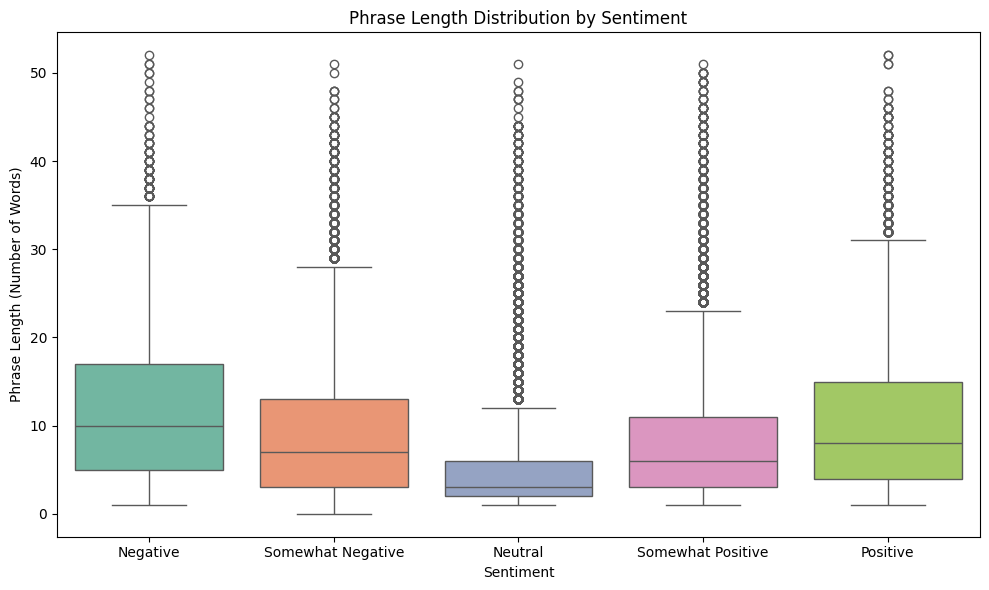

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='Set2')
plt.title('Phrase Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Phrase Length (Number of Words)')
plt.xticks(ticks=range(5), labels=['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive'])
plt.tight_layout()
plt.show()


### 3. Mean Phrase Length per Sentiment (Bar Chart)

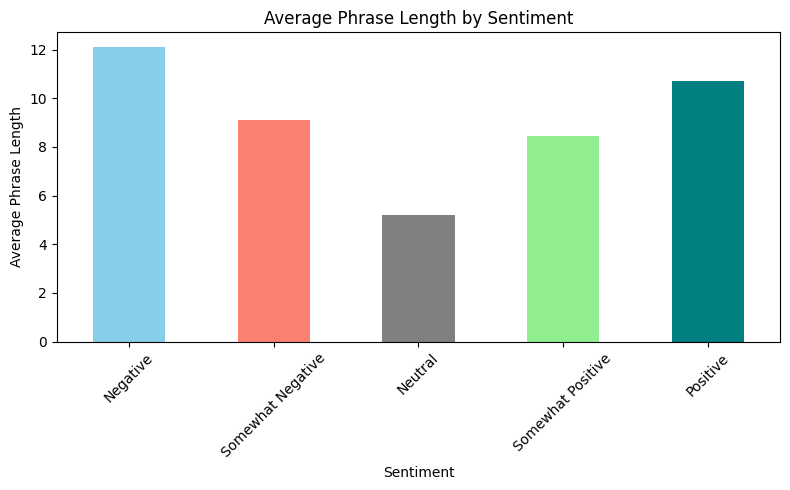

In [ ]:
# Define custom colors for each sentiment
colors = ['skyblue', 'salmon', 'gray', 'lightgreen', 'teal']

# Compute mean phrase length per sentiment
mean_lengths = raw_df.groupby('Sentiment')['Phrase_Length'].mean()

# Plot with different colors
plt.figure(figsize=(8, 5))
mean_lengths.plot(kind='bar', color=colors)

# Customize plot
plt.title('Average Phrase Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Phrase Length')
plt.xticks(ticks=range(5), labels=['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive'], rotation=45)
plt.tight_layout()
plt.show()


### 4. Violin Plot

<ipython-input-30-049e3d232b96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='Pastel1', inner='quartile')


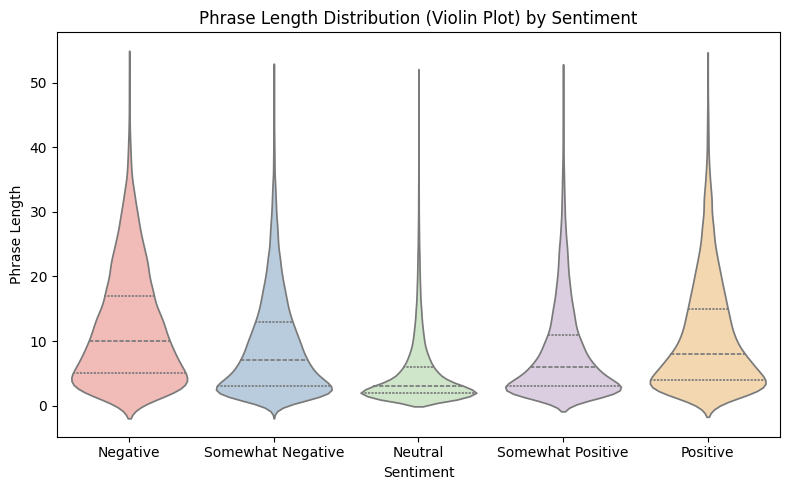

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='Pastel1', inner='quartile')
plt.title('Phrase Length Distribution (Violin Plot) by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Phrase Length')
plt.xticks(ticks=range(5), labels=['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive'])
plt.tight_layout()
plt.show()


##  2. Most Common Words per Sentiment

In [ ]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_top_words(df, sentiment_label, n=10):
    words = ' '.join(df[df['Sentiment'] == sentiment_label]['Phrase']).lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return Counter(words).most_common(n)

# Example: Top 10 words for each sentiment
for i in range(5):
    print(f"\nTop words for {sentiment_labels[i]}:")
    print(get_top_words(raw_df, i))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Top words for Negative:
[('movie', 760), ('film', 480), ('bad', 434), ('like', 324), ('one', 284), ('characters', 167), ('comedy', 165), ('even', 164), ('minutes', 161), ('story', 153)]

Top words for Somewhat Negative:
[('movie', 1379), ('film', 1271), ('like', 913), ('one', 720), ('much', 594), ('story', 528), ('little', 490), ('characters', 455), ('bad', 427), ('even', 407)]

Top words for Neutral:
[('film', 2158), ('movie', 1894), ('one', 1283), ('like', 1110), ('story', 942), ('much', 695), ('time', 681), ('life', 647), ('characters', 614), ('movies', 571)]

Top words for Somewhat Positive:
[('film', 1844), ('movie', 1296), ('good', 859), ('one', 823), ('story', 661), ('funny', 629), ('like', 578), ('characters', 497), ('love', 491), ('comedy', 463)]

Top words for Positive:
[('film', 936), ('movie', 576), ('one', 499), ('best', 370), ('funny', 345), ('good', 289), ('performances', 253), ('story', 236), ('comedy', 231), ('great', 220)]


## 3. Word Cloud per Sentiment

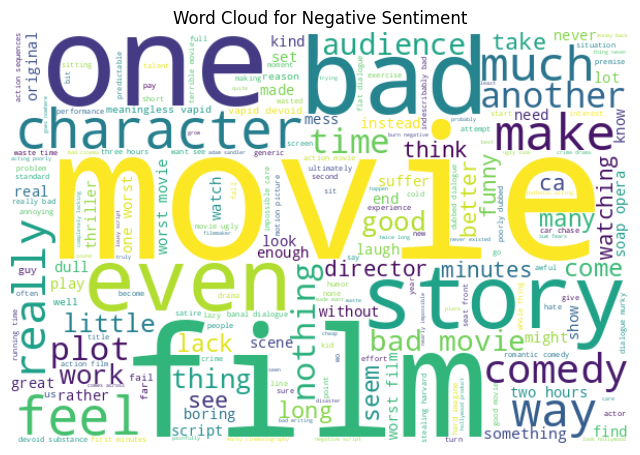

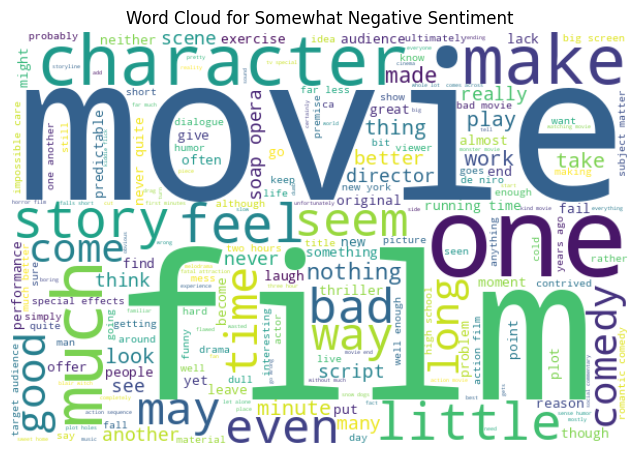

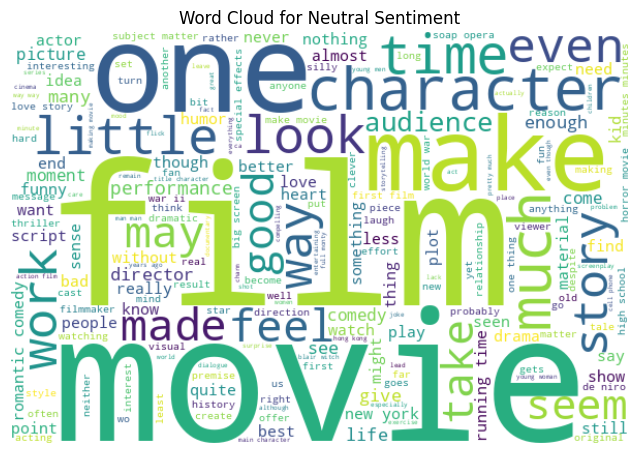

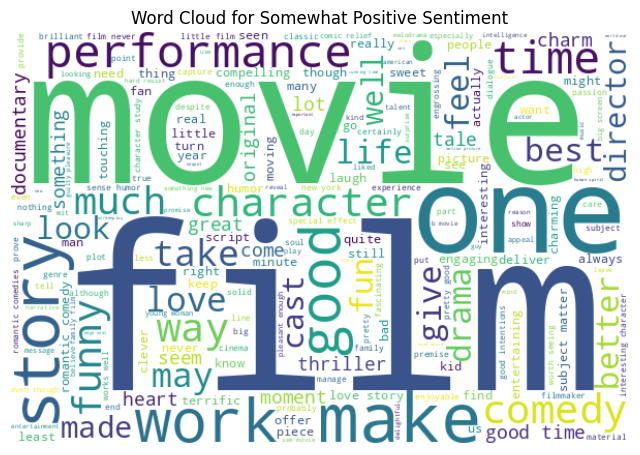

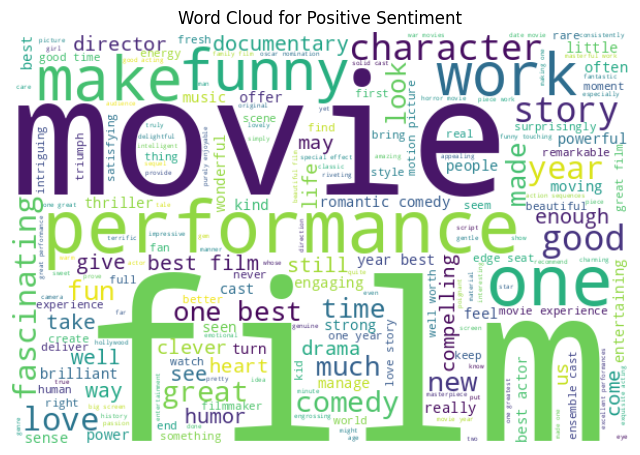

In [ ]:
from wordcloud import WordCloud

for i in range(5):
    text = ' '.join(raw_df[raw_df['Sentiment'] == i]['Phrase']).lower()
    text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
    wc = WordCloud(width=600, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment_labels[i]} Sentiment")
    plt.show()


##  4. Phrase Count per Sentence

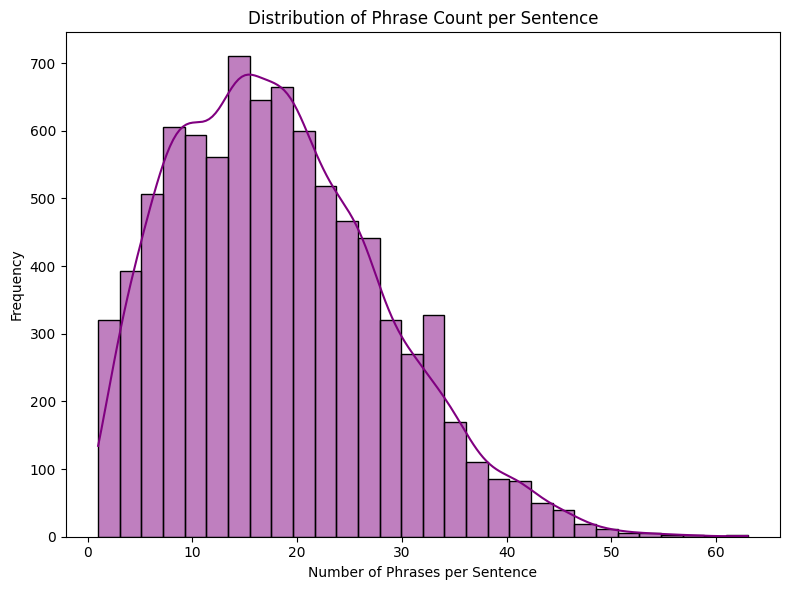

In [ ]:
phrase_counts = raw_df.groupby('SentenceId')['PhraseId'].count()

plt.figure(figsize=(8, 6))
sns.histplot(phrase_counts, bins=30, kde=True, color='purple')
plt.title('Distribution of Phrase Count per Sentence')
plt.xlabel('Number of Phrases per Sentence')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## 5. Sentiment Distribution by Sentence Length

<ipython-input-34-9588e868e02f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sent, x='LengthBin', y='AverageSentiment', palette='coolwarm')


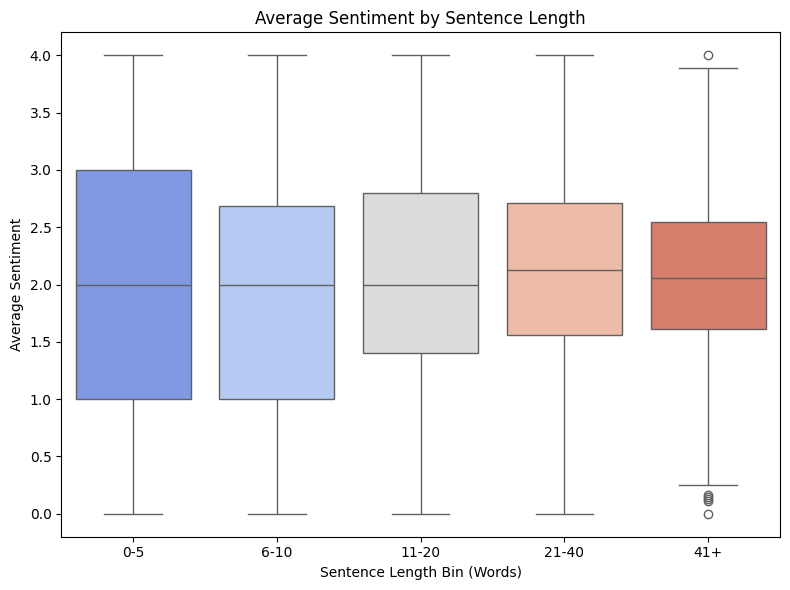

In [ ]:
# Add sentence length per sentence
sentence_lengths = raw_df.groupby('SentenceId')['Phrase'].apply(lambda x: ' '.join(x)).apply(lambda x: len(x.split()))
sentiment_by_sentence = raw_df.groupby('SentenceId')['Sentiment'].mean()

df_sent = pd.DataFrame({'SentenceLength': sentence_lengths, 'AverageSentiment': sentiment_by_sentence})

# Bin sentence lengths
df_sent['LengthBin'] = pd.cut(df_sent['SentenceLength'], bins=[0, 5, 10, 20, 40, 100], labels=['0-5','6-10','11-20','21-40','41+'])

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_sent, x='LengthBin', y='AverageSentiment', palette='coolwarm')
plt.title('Average Sentiment by Sentence Length')
plt.xlabel('Sentence Length Bin (Words)')
plt.ylabel('Average Sentiment')
plt.tight_layout()
plt.show()


### Implenent TF-IDF Technique

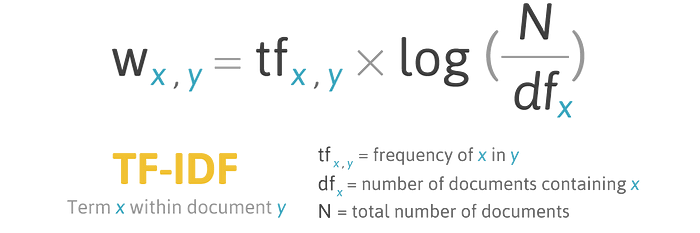

In [ ]:
# @title
from PIL import Image
from IPython.display import display
img = Image.open('TF-IDF.png')
display(img)

Outline:
1. Learn the vocabulary using `TfidfVectorizer`

2. Transform traing and test data.

## Learn the vocabulary using `TfidfVectorizer`
- Create custom tokenizer with stemming

- Create a list of stop words

- Create and configure `TfidfVectorizer`

- Learn the vocabulary from the training data

- View sample entries from the vocabulary

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
word_tokenize('is this the (real) life??')

['is', 'this', 'the', '(', 'real', ')', 'life', '?', '?']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
','.join(english_stopwords[ :115])

"a,about,above,after,again,against,ain,all,am,an,and,any,are,aren,aren't,as,at,be,because,been,before,being,below,between,both,but,by,can,couldn,couldn't,d,did,didn,didn't,do,does,doesn,doesn't,doing,don,don't,down,during,each,few,for,from,further,had,hadn,hadn't,has,hasn,hasn't,have,haven,haven't,having,he,he'd,he'll,her,here,hers,herself,he's,him,himself,his,how,i,i'd,if,i'll,i'm,in,into,is,isn,isn't,it,it'd,it'll,it's,its,itself,i've,just,ll,m,ma,me,mightn,mightn't,more,most,mustn,mustn't,my,myself,needn,needn't,no,nor,not,now,o,of,off,on,once,only,or,other,our"

In [ ]:
selected_stopwords = english_stopwords[ :115]

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer(language="english")

In [ ]:
stemmer.stem("gone")

'gone'

In [ ]:
def tokenize(text):
  return[stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [ ]:
tokenize('is this the (real) life?? or is just some fantasy')

['is', 'this', 'the', 'real', 'life', 'or', 'is', 'just', 'some', 'fantasi']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words=selected_stopwords,
                             ngram_range=(1,2),
                             max_features=2000,
                             )

In [ ]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', 'need', 'onc', 'onli'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7bcad8cc6200>)

In [ ]:
len(vectorizer.vocabulary_)

2000

In [ ]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abil to', 'abl', 'abl to', 'abov', 'absolut',
       'absorb', 'abstract', 'absurd', 'accent', 'accept', 'access',
       'accomplish', 'ach', 'achiev', 'across', 'act', 'action',
       'action film', 'action movi', 'action sequenc', 'actor', 'actress',
       'actual', 'ad', 'adam', 'adam sandler', 'adapt', 'add', 'admir',
       'admit', 'adolesc', 'adult', 'adventur', 'affair', 'affect', 'age',
       'ago', 'ahead', 'aim', 'air', 'alien', 'aliv', 'allen', 'allow',
       'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'although',
       'alway', 'amateurish', 'amaz', 'ambigu', 'ambit', 'ambiti',
       'america', 'american', 'among', 'amount', 'amus', 'analyz',
       'angst', 'ani', 'ani the', 'anim', 'annoy', 'anoth', 'answer',
       'anyon', 'anyon who', 'anyth', 'apart', 'appar', 'appeal',
       'appeal to', 'appear', 'appreci', 'approach', 'area', 'argu',
       'around', 'arriv', 'art', 'artifici', 'artist', 'ask', 'aspect',
       'aspir

## Transform Training and Test data
- Transform pharases from the training set

- Transform pharases from the test set

- Look at some example values

In [ ]:
raw_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
%%time
inputs = vectorizer.transform(raw_df.Phrase)

CPU times: user 25.5 s, sys: 77.2 ms, total: 25.6 s
Wall time: 26.3 s


In [ ]:
inputs.shape

(156060, 2000)

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.22672932, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27107452, 0.24064156, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [102]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [106]:
test_df = test_df.drop(index=15519)
sub_df = sub_df.drop(index=15519)

In [107]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [108]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [105]:
# Find rows where 'Phrase' is NaN
missing_rows = test_df[test_df["Phrase"].isna()]

# Display the problematic row(s)
print(missing_rows)

       PhraseId  SentenceId Phrase
15519    171580        9213    NaN


In [ ]:
# Remove the row with missing Phrase
test_df = test_df.dropna(subset=["Phrase"])


In [104]:
test_inputs = vectorizer.transform(test_df.Phrase)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
test_inputs.shape

(66291, 2000)

In [ ]:
test_inputs.toarray()[0][:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Train a Baseline Model and Submit to Kaggle
- Split the data in to training and validation sets

- Train a logistic regression model

- Study predictions on sample phrases

- Make predictions and submit to kaggle

### Split the data in to training and validation sets

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
TRAIN_SIZE = 110_000

In [ ]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [ ]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [ ]:
val_inputs = inputs[:TRAIN_SIZE]
val_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [ ]:
val_inputs.shape, val_targets.shape

((110000, 2000), (110000,))

## Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

model = LogisticRegression(max_iter=1000, solver='sag')

In [ ]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 2.32 s, sys: 10.3 ms, total: 2.33 s
Wall time: 2.36 s


LogisticRegression(max_iter=1000, solver='sag')

In [ ]:
train_targets

,Sentiment
0,1
1,2
2,2
3,2
4,2
...,...
109995,1
109996,0
109997,1
109998,0


In [ ]:
train_preds = model.predict(train_inputs)
train_preds

array([3, 2, 2, ..., 0, 0, 2])

### Assessing Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_preds, train_targets)

0.6352818181818182

## Study Predictionbs on a Sample Inputs

In [ ]:
small_df = raw_df.sample(20)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
67167,67168,3408,the by now intolerable morbidity,1
82303,82304,4249,"seen ,",2
136583,136584,7384,a gag,2
19055,19056,836,Not only better,3
75592,75593,3875,"fare , with enough",3
85153,85154,4404,attempt to complicate the story,2
132538,132539,7146,'s a disloyal satyr,2
95624,95625,4993,other childish things,2
34746,34747,1634,been filmed more irresistibly than in ` Baran,3
121320,121321,6497,"Been there , done that ... a thousand times al...",1


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2000)

In [ ]:
small_preds = model.predict(small_inputs)

In [ ]:
small_preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 3])

## Make Predictions and Submit to Kaggle

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 235603 stored elements and shape (66291, 2000)>

In [ ]:
test_preds = model.predict(test_inputs)

In [ ]:
test_preds

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [109]:
sub_df.Sentiment = test_preds
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [110]:
sub_df.to_csv('submission.csv', index=None)

In [111]:
!head submission.csv

PhraseId,Sentiment
156061,2
156062,2
156063,2
156064,2
156065,2
156066,3
156067,3
156068,2
156069,3


## Train and Fine tune Different Models
Model to try;
- Decision trees
- Random Forests
- Naive Bayes
- SVM

Optional:
- Use PCA for dimensionality reduction
- Compare classification and regression models

Tips:
- When using a regresssion model, make sure to round off the predictions to range of `[1,5]`
- Track your progress

### Model - 1: Naive Bayes